# Introduction

## Dataset Overview

Deeds (Digital Electronic Education and Design Suite) (Ponta et al., 1998) is a simulation environment for e-learning in digital electronics. The environment provides learning materials through specialized browsers for the students, and asks them to solve various problems with different levels of difficulty. 

The EPM dataset was collected from University of Genoa by using Deeds, students are required to use Deeds to learn digital electronics which consists of 6 sessions. All the log data of students using Deeds system was collected during the process of learning: activities, time, mouse clicks and key strokes. At the end of each session, student will need to finish an assignment, and the grade of the assignment was recorded in the intermediate grade dataframe. In the end of the semester, final exam grades of all students was recorded in the final grades dataset. 

In [1]:
import requests
import zipfile
import io
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Gathering Data

Download dataset:

In [4]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00346/EPMDataset%20.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('../educational-process-mining')

Input all the sessions data:

In [2]:
# read all the session data and save them into a dictionary
sessions = {}
for x in range(1, 7):
    path = '../educational-process-mining/EPM Dataset 2/Data/Processes/Session {0}'.format(x)
    session = glob.glob(os.path.join(path, '*'))
    dataframes = (pd.read_csv(f, names=['session', 'student_Id', 'exercise', 'activity',
                                        'start_time', 'end_time', 'idle_time', 'mouse_wheel', 
                                        'mouse_wheel_click', 'mouse_click_left', 'mouse_click_right', 
                                        'mouse_movement', 'keystroke']) for f in session)
    sessions['session{0}'.format(x)] = pd.concat(dataframes, ignore_index=True, sort=False)

In [3]:
sessions['session1'].head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,1,59,Es,Other,2.10.2014 11:24:0,2.10.2014 11:24:3,421,0,0,2,0,106,0
1,1,59,Es,Deeds,2.10.2014 11:24:5,2.10.2014 11:25:42,4573639,0,0,2,0,107,0
2,1,59,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:44,0,0,0,2,0,123,0
3,1,59,Es_1_1,Study_Es_1_1,2.10.2014 11:25:45,2.10.2014 11:26:46,1652751,0,0,2,0,107,0
4,1,59,Es_1_1,Deeds,2.10.2014 11:26:47,2.10.2014 11:26:47,0,0,0,2,0,18,0


In [4]:
sessions['session2'].head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,2,61,Es,Other,16.10.2014 11:55:13,16.10.2014 11:55:20,1607,0,0,2,0,350,0
1,2,61,Es,Aulaweb,16.10.2014 11:55:21,16.10.2014 11:55:26,94,7,0,8,0,334,0
2,2,61,Es_2_1,TextEditor_Es_2_1,16.10.2014 11:55:27,16.10.2014 11:55:31,217,3,0,8,0,210,6
3,2,61,Es_2_1,Study_Es_2_1,16.10.2014 11:55:32,16.10.2014 11:55:33,16,0,0,0,0,0,9
4,2,61,Es_2_1,Aulaweb,16.10.2014 11:55:34,16.10.2014 11:55:34,0,0,0,0,0,0,2


In [5]:
sessions['session6'].tail()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
53165,6,25,Es_6_3,Study_Es_6_3,11.12.2014 14:23:23,11.12.2014 14:23:25,15,0,0,2,0,40,0
53166,6,25,Es_6_3,Other,11.12.2014 14:23:26,11.12.2014 14:23:29,157,0,0,2,0,160,0
53167,6,25,Es_6_3,Other,11.12.2014 14:23:30,11.12.2014 14:23:30,0,0,0,2,0,32,0
53168,6,25,Es_6_3,Other,11.12.2014 14:23:31,11.12.2014 14:23:32,0,0,0,3,0,77,0
53169,6,25,Es_6_3,Blank,11.12.2014 14:23:33,11.12.2014 14:23:34,0,0,0,1,0,79,0


Input log data:

In [6]:
logs = pd.read_csv('../educational-process-mining/EPM Dataset 2/Data/logs.txt', sep='\t')

In [7]:
logs.head()

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
0,1,1,1,0,1,1,1
1,2,1,1,1,1,1,1
2,3,0,1,1,1,1,0
3,4,1,1,1,1,1,1
4,5,1,1,1,1,1,1


Final grades data:

In [8]:
final_grades_1st = pd.read_excel('../educational-process-mining/EPM Dataset 2/Data/final_grades.xlsx', sheet_name='Exam (First time)')
final_grades_2nd = pd.read_excel('../educational-process-mining/EPM Dataset 2/Data/final_grades.xlsx', sheet_name='Exam (Second time)')

In [9]:
final_grades_1st.head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,3,2.0,3,1.0,2.0,1,2,2,2.0,3.0,15.0,10.0,1,5.0,3.0,18.0,15,85.0
1,6,2.0,3,2.0,3.0,1,2,2,0.0,3.0,15.0,7.0,2,9.0,3.0,13.0,15,82.0
2,7,2.0,3,1.0,1.5,1,2,0,0.0,3.0,5.0,4.0,0,0.0,3.0,17.0,10,52.5
3,10,2.0,3,2.0,1.5,1,2,0,2.0,3.0,11.0,1.0,2,10.0,1.5,7.0,10,59.0
4,13,2.0,3,2.0,1.5,1,2,2,2.0,3.0,14.5,10.0,2,2.0,3.0,25.0,15,90.0


In [10]:
final_grades_2nd.head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,1,2.0,3.0,1.0,0.5,1.0,2,2.0,2,3,15,10.0,2.0,10.0,3.0,25.0,13.0,94.5
1,2,2.0,3.0,2.0,0.5,1.0,2,0.0,2,3,15,2.0,0.0,5.0,1.5,5.0,0.0,44.0
2,4,2.0,3.0,1.0,0.5,1.0,2,0.0,2,0,3,4.0,0.0,1.5,0.0,5.0,5.0,30.0
3,5,2.0,3.0,2.0,1.5,1.0,2,2.0,2,3,3,2.0,1.5,9.0,1.5,2.0,1.0,38.5
4,7,2.0,3.0,1.0,1.5,1.0,2,2.0,2,3,15,10.0,1.0,2.5,0.0,20.0,12.0,78.0


Intermediate grades data:

In [111]:
inter_grades = pd.read_excel('../educational-process-mining/EPM Dataset 2/Data/intermediate_grades.xlsx')

In [112]:
inter_grades.head()

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,1,5.0,0.0,4.5,4.0,2.25
1,2,4.0,3.5,4.5,4.0,1.00
2,3,3.5,3.5,4.5,4.0,0.00
3,4,6.0,4.0,5.0,3.5,2.75
4,5,5.0,4.0,5.0,4.0,2.75


# Accessing Data

There are some 0 scores in the intermediate grades dataset, and we know that the logs dataset marked all the student has log in a session with value 1, while those has not log in a session with value 0, so here comes the question: were all the students without log got a 0 score in the intermediate grades?

We can use the test below to check this question:

In [13]:
no_inter_grades = (inter_grades == 0)
no_inter_grades

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
110,False,False,True,True,False,True
111,False,True,True,True,True,True
112,False,True,True,True,True,True
113,False,True,True,True,True,True


In [14]:
no_log = (logs == 0)
no_log

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
0,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
110,False,False,True,True,True,True,True
111,False,False,True,True,True,True,True
112,False,False,True,True,True,True,True
113,False,False,True,True,True,True,True


In [15]:
no_log.drop('Session 1', axis=1, inplace=True)

In [16]:
no_log

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
110,False,True,True,True,True,True
111,False,True,True,True,True,True
112,False,True,True,True,True,True
113,False,True,True,True,True,True


In [17]:
no_grade_contrast = (no_log != no_inter_grades)

In [18]:
no_grade_contrast.loc[no_grade_contrast['Session 2'] == True]

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
26,False,True,False,False,False,False
34,False,True,False,False,False,False
54,False,True,False,False,False,True
59,False,True,True,False,False,False
60,False,True,False,False,False,False
65,False,True,False,False,False,False
67,False,True,False,False,False,False
88,False,True,False,False,False,False
106,False,True,False,False,False,False
110,False,True,False,False,True,False


All those True values means that not all the no log students get a zero score in intermediate grades. We can dig into those student Id to have a look of it.

In [19]:
se2_index = no_grade_contrast.loc[no_grade_contrast['Session 2'] == True].index

In [20]:
inter_grades.iloc[se2_index]

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
26,27,0.0,3.0,4.5,4.0,1.75
34,35,0.5,0.5,3.5,3.5,1.50
54,55,2.0,3.5,4.5,4.0,2.50
59,60,2.0,0.5,4.0,3.5,1.00
60,61,0.0,1.0,4.5,3.5,1.50
65,66,0.0,2.0,4.5,3.0,2.25
67,68,5.5,3.5,5.0,4.0,3.00
88,89,0.5,1.5,3.5,2.5,0.50
106,107,0.0,1.0,0.0,0.0,0.00
110,111,3.0,0.0,0.0,3.0,0.00


In [21]:
logs.iloc[se2_index]

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
26,27,0,1,1,1,1,1
34,35,0,0,1,1,1,1
54,55,1,0,1,1,1,0
59,60,0,0,0,1,1,1
60,61,0,1,1,1,1,1
65,66,1,1,1,1,1,1
67,68,1,0,1,1,1,1
88,89,0,0,1,1,1,1
106,107,0,1,1,0,0,0
110,111,1,0,0,0,0,0


It is quite strange that student id 27 has log in session 2 but get a 0 score, while student id 35 has no log in session 2 but get a 0.5 score. 

If one of the students did not log in a session then that student would get a 0 score in the assignment of that session because that student did not even log into that session, he or she cannot finish the exercise in that DEEDS session. 

But the data breaks our hypothesis, we should now assume that assignments are independent from the Deeds system.

After the finding of this problem, we contacted the dataset author doctor Mehrnoosh Vahdat, she explained that the experiments and data collection was hold in parallel with the sessions trying to influence the normal learning processes as few as possible, but doctor Vahdat and her team cannot force all of the students attend all the sessions and record all the data, it could happen that the student was not in the session but still did his or her exercises with Deeds and submitted, or attended the session but did not really complete the exercises and did not submit anything at the end. 

**To make the analysis clear, we decided to use those students who attended in from session 2 to session 6.**

The final grades has 2 datasets: first exam and second exam, some student attend both exams, and the detail of both exams are different but addressed the same concepts. We can check who attended both exams:

In [22]:
attend_1st_id = np.asarray(final_grades_1st['Student ID'])
attend_2nd_id = np.asarray(final_grades_2nd['Student ID'])

In [23]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
    if (a_set & b_set):
        print(a_set & b_set)
    else:
        print('No common elements')

In [24]:
attend_both = common_member(attend_1st_id, attend_2nd_id)

{7, 20, 24, 30, 37, 39, 44, 46, 51, 56, 59, 62, 67, 68, 73, 83, 87, 92, 99, 101, 106}


**To solve this discrepancy, we decided to use the mean of two final grades as the final grades of those students.**

# Cleaning Data

As mentioned in the accessing data part, we decided to clean our data based on two points:

* **For clarity and reliability, we use those students who attended in from session 2 to session 6.**
* **Use the mean of the two final grades as the final grades of those students who took the final twice.**

Firstly, we keep the students who attended in all 6 sessions:

In [147]:
ID_list = logs.loc[(logs["Session 2"]==1) & (logs["Session 3"]==1) & \
                   (logs["Session 4"]==1) & (logs["Session 5"]==1) & (logs["Session 6"]==1)]
ID_list.head()

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
1,2,1,1,1,1,1,1
3,4,1,1,1,1,1,1
4,5,1,1,1,1,1,1
5,6,0,1,1,1,1,1
6,7,1,1,1,1,1,1


In [148]:
ID_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 1 to 98
Data columns (total 7 columns):
Student Id    63 non-null int64
Session 1     63 non-null int64
Session 2     63 non-null int64
Session 3     63 non-null int64
Session 4     63 non-null int64
Session 5     63 non-null int64
Session 6     63 non-null int64
dtypes: int64(7)
memory usage: 3.9 KB


Now we clean the final grades dataset:

In [149]:
final = final_grades_1st.append(final_grades_2nd)
final.sort_values(by=['Student ID']).head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,1,2.0,3.0,1.0,0.5,1.0,2,2.0,2.0,3.0,15.0,10.0,2.0,10.0,3.0,25.0,13.0,94.5
1,2,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0
0,3,2.0,3.0,1.0,2.0,1.0,2,2.0,2.0,3.0,15.0,10.0,1.0,5.0,3.0,18.0,15.0,85.0
2,4,2.0,3.0,1.0,0.5,1.0,2,0.0,2.0,0.0,3.0,4.0,0.0,1.5,0.0,5.0,5.0,30.0
3,5,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.0,1.5,2.0,1.0,38.5


In [150]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 61
Data columns (total 18 columns):
Student ID            114 non-null int64
ES 1.1 
(2 points)    114 non-null float64
ES 1.2 
(3 points)    114 non-null float64
ES 2.1
(2 points)     114 non-null float64
ES 2.2
(3 points)     114 non-null float64
ES 3.1
(1 points)     114 non-null float64
ES 3.2
(2 points)     114 non-null int64
ES 3.3
(2 points)     114 non-null float64
ES 3.4
(2 points)     114 non-null float64
ES 3.5
(3 points)     114 non-null float64
ES 4.1
(15 points)    114 non-null float64
ES 4.2
(10 points)    114 non-null float64
ES 5.1
(2 points)     114 non-null float64
ES 5.2
(10 points)    114 non-null float64
ES 5.3
(3 points)     114 non-null float64
ES 6.1
(25 points)    114 non-null float64
ES 6.2
(15 points)    114 non-null float64
TOTAL
(100 points)    114 non-null float64
dtypes: float64(16), int64(2)
memory usage: 16.9 KB


Calculate the mean of the final grades for those students who took the exam twice:

In [151]:
dup_rows = final[final['Student ID'].duplicated(keep=False)]

In [152]:
final.drop(dup_rows.index, axis=0, inplace=True)

In [153]:
avg_grades = dup_rows.groupby('Student ID').mean()
avg_grades.insert(0, column='Student ID', value=avg_grades.index)

In [154]:
final = final.append(avg_grades).sort_values(by=['Student ID'])

Subset with only those students who attended in all 6 sessions:

In [155]:
final = final[final['Student ID'].isin(ID_list['Student Id'])]
final

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
1,2,2.00,3.0,2.00,0.50,1.0,2,0.0,2.0,3.00,15.00,2.0,0.00,5.00,1.50,5.00,0.00,44.00
3,5,2.00,3.0,2.00,1.50,1.0,2,2.0,2.0,3.00,3.00,2.0,1.50,9.00,1.50,2.00,1.00,38.50
1,6,2.00,3.0,2.00,3.00,1.0,2,2.0,0.0,3.00,15.00,7.0,2.00,9.00,3.00,13.00,15.00,82.00
7,7,2.00,3.0,1.00,1.50,1.0,2,1.0,1.0,3.00,10.00,7.0,0.50,1.25,1.50,18.50,11.00,65.25
3,10,2.00,3.0,2.00,1.50,1.0,2,0.0,2.0,3.00,11.00,1.0,2.00,10.00,1.50,7.00,10.00,59.00
7,11,2.00,3.0,1.00,0.50,1.0,2,2.0,2.0,3.00,12.00,3.0,2.00,8.00,1.50,12.00,5.00,60.00
8,12,2.00,3.0,0.50,2.00,1.0,2,0.0,2.0,3.00,15.00,2.0,0.50,5.50,2.00,0.00,0.00,40.50
5,15,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.00,4.00,1.50,2.00,15.00,67.50
6,16,2.00,3.0,1.00,0.00,1.0,2,2.0,2.0,3.00,3.00,9.0,1.00,0.00,3.00,20.00,15.00,67.00
7,17,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.00,10.00,3.00,24.00,15.00,97.00


Create a pass or fail indicator for the final grades:

In [156]:
df = final.copy()

In [157]:
df['pass_IND'] = (df['TOTAL\n(100 points)'] >= 60).astype(int)

In [158]:
df.head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points),pass_IND
1,2,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.00,1.5,5.0,0.0,44.00,0
3,5,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.00,1.5,2.0,1.0,38.50,0
1,6,2.0,3.0,2.0,3.0,1.0,2,2.0,0.0,3.0,15.0,7.0,2.0,9.00,3.0,13.0,15.0,82.00,1
7,7,2.0,3.0,1.0,1.5,1.0,2,1.0,1.0,3.0,10.0,7.0,0.5,1.25,1.5,18.5,11.0,65.25,1
3,10,2.0,3.0,2.0,1.5,1.0,2,0.0,2.0,3.0,11.0,1.0,2.0,10.00,1.5,7.0,10.0,59.00,0


Now, we combine the intermediate grades data with final grades for exploratory data analysis and model building:

In [159]:
# Standardize the intermediate grades before joining:

from sklearn import preprocessing
inter_grades['se2'] = preprocessing.scale(inter_grades['Session 2'])
inter_grades['se3'] = preprocessing.scale(inter_grades['Session 3'])
inter_grades['se4'] = preprocessing.scale(inter_grades['Session 4'])
inter_grades['se5'] = preprocessing.scale(inter_grades['Session 5'])
inter_grades['se6'] = preprocessing.scale(inter_grades['Session 6'])
inter_grades.head()

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6,se2,se3,se4,se5,se6
0,1,5.0,0.0,4.5,4.0,2.25,1.013856,-1.387681,0.364976,0.655440,0.456479
1,2,4.0,3.5,4.5,4.0,1.00,0.534048,0.887438,0.364976,0.655440,-0.572837
2,3,3.5,3.5,4.5,4.0,0.00,0.294143,0.887438,0.364976,0.655440,-1.396290
3,4,6.0,4.0,5.0,3.5,2.75,1.493665,1.212455,0.692884,0.317433,0.868206
4,5,5.0,4.0,5.0,4.0,2.75,1.013856,1.212455,0.692884,0.655440,0.868206


Combine both dataset:

In [160]:
df_clean = pd.merge(inter_grades, df, how="inner", left_on="Student Id", right_on="Student ID")

# drop the duplicated column
df_clean.drop(['Student ID'], axis=1, inplace=True)

# rename columns
df_clean.rename(columns={"Student Id": 'ID', "TOTAL\n(100 points)": 'total'}, inplace=True)

pd.set_option('max_columns', 80)
df_clean.head()

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,se2,se3,se4,se5,se6,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),total,pass_IND
0,2,4.0,3.5,4.5,4.0,1.00,0.534048,0.887438,0.364976,0.655440,-0.572837,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.00,1.5,5.0,0.0,44.00,0
1,5,5.0,4.0,5.0,4.0,2.75,1.013856,1.212455,0.692884,0.655440,0.868206,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.00,1.5,2.0,1.0,38.50,0
2,6,5.5,3.5,4.5,3.0,3.00,1.253760,0.887438,0.364976,-0.020574,1.074069,2.0,3.0,2.0,3.0,1.0,2,2.0,0.0,3.0,15.0,7.0,2.0,9.00,3.0,13.0,15.0,82.00,1
3,7,4.0,4.0,4.5,4.0,2.00,0.534048,1.212455,0.364976,0.655440,0.250616,2.0,3.0,1.0,1.5,1.0,2,1.0,1.0,3.0,10.0,7.0,0.5,1.25,1.5,18.5,11.0,65.25,1
4,10,5.0,4.0,4.5,4.0,3.00,1.013856,1.212455,0.364976,0.655440,1.074069,2.0,3.0,2.0,1.5,1.0,2,0.0,2.0,3.0,11.0,1.0,2.0,10.00,1.5,7.0,10.0,59.00,0


Save the clean dataset for further analysis:

In [161]:
df_clean.to_csv("epm_clean.csv", encoding='utf-8', index=False)

# Exploratory Data Analysis

Time to do some exploratory data analysis.

In [165]:
df_clean = pd.read_csv("epm_clean.csv")
df_clean.head()

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,se2,se3,se4,se5,se6,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),total,pass_IND
0,2,4.0,3.5,4.5,4.0,1.00,0.534048,0.887438,0.364976,0.655440,-0.572837,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.00,1.5,5.0,0.0,44.00,0
1,5,5.0,4.0,5.0,4.0,2.75,1.013856,1.212455,0.692884,0.655440,0.868206,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.00,1.5,2.0,1.0,38.50,0
2,6,5.5,3.5,4.5,3.0,3.00,1.253760,0.887438,0.364976,-0.020574,1.074069,2.0,3.0,2.0,3.0,1.0,2,2.0,0.0,3.0,15.0,7.0,2.0,9.00,3.0,13.0,15.0,82.00,1
3,7,4.0,4.0,4.5,4.0,2.00,0.534048,1.212455,0.364976,0.655440,0.250616,2.0,3.0,1.0,1.5,1.0,2,1.0,1.0,3.0,10.0,7.0,0.5,1.25,1.5,18.5,11.0,65.25,1
4,10,5.0,4.0,4.5,4.0,3.00,1.013856,1.212455,0.364976,0.655440,1.074069,2.0,3.0,2.0,1.5,1.0,2,0.0,2.0,3.0,11.0,1.0,2.0,10.00,1.5,7.0,10.0,59.00,0


In [166]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 29 columns):
ID                    44 non-null int64
Session 2             44 non-null float64
Session 3             44 non-null float64
Session 4             44 non-null float64
Session 5             44 non-null float64
Session 6             44 non-null float64
se2                   44 non-null float64
se3                   44 non-null float64
se4                   44 non-null float64
se5                   44 non-null float64
se6                   44 non-null float64
ES 1.1 
(2 points)    44 non-null float64
ES 1.2 
(3 points)    44 non-null float64
ES 2.1
(2 points)     44 non-null float64
ES 2.2
(3 points)     44 non-null float64
ES 3.1
(1 points)     44 non-null float64
ES 3.2
(2 points)     44 non-null int64
ES 3.3
(2 points)     44 non-null float64
ES 3.4
(2 points)     44 non-null float64
ES 3.5
(3 points)     44 non-null float64
ES 4.1
(15 points)    44 non-null float64
ES 4.2
(10 points) 

In [167]:
df_clean.describe()

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,se2,se3,se4,se5,se6,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),total,pass_IND
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,51.409091,3.863636,3.159091,4.613636,3.784091,2.357955,0.468619,0.665835,0.439501,0.509483,0.545375,1.897727,2.840909,1.414773,1.380682,0.954545,1.886364,1.340909,1.772727,2.346591,11.028409,6.204545,1.119318,5.039773,1.801136,12.471591,8.159091,61.659091,0.613636
std,31.622275,1.507206,0.919888,0.338664,0.330569,0.757516,0.723170,0.597959,0.222102,0.223470,0.623779,0.271292,0.428257,0.572995,0.940820,0.145402,0.386752,0.887725,0.565012,1.128664,4.972662,3.213920,0.798779,3.457778,1.026650,8.857761,5.664067,23.804136,0.492545
min,2.000000,0.000000,1.000000,4.000000,3.000000,0.500000,-1.385186,-0.737647,0.037068,-0.020574,-0.984563,1.000000,1.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.750000,0.000000
25%,19.500000,3.000000,2.500000,4.500000,3.500000,2.000000,0.054239,0.237404,0.364976,0.317433,0.250616,2.000000,3.000000,1.000000,0.500000,1.000000,2.000000,0.000000,2.000000,1.875000,8.625000,3.750000,0.500000,2.500000,1.437500,4.375000,2.500000,43.187500,0.000000
50%,53.000000,4.000000,3.500000,4.500000,4.000000,2.625000,0.534048,0.887438,0.364976,0.655440,0.765274,2.000000,3.000000,1.375000,1.500000,1.000000,2.000000,2.000000,2.000000,3.000000,13.000000,7.000000,1.000000,5.000000,1.500000,12.500000,10.000000,63.750000,1.000000
75%,79.750000,5.000000,4.000000,5.000000,4.000000,3.000000,1.013856,1.212455,0.692884,0.655440,1.074069,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,15.000000,9.250000,2.000000,8.000000,3.000000,19.187500,13.000000,79.125000,1.000000
max,99.000000,6.000000,4.000000,5.000000,4.000000,4.000000,1.493665,1.212455,0.692884,0.655440,1.897522,2.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,3.000000,15.000000,10.000000,2.000000,10.000000,3.000000,25.000000,15.000000,98.000000,1.000000


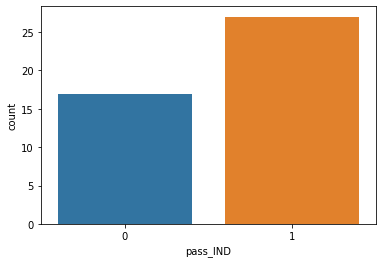

In [169]:
sns.countplot(x='pass_IND', data=df_clean);

In [178]:
scaled_grades = df_clean.iloc[:, 6:11]

In [179]:
cor_matrix = scaled_grades.corr()
cor_matrix.style.background_gradient(cmap='viridis_r')

,se2,se3,se4,se5,se6
se2,1,0.728885,0.372769,0.371289,0.430755
se3,0.728885,1,0.407179,0.364138,0.383608
se4,0.372769,0.407179,1,0.32812,0.438316
se5,0.371289,0.364138,0.32812,1,-0.0440607
se6,0.430755,0.383608,0.438316,-0.0440607,1


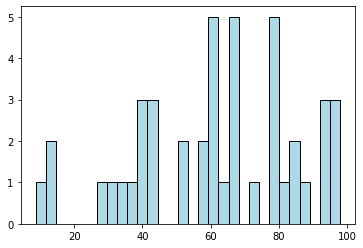

In [189]:
plt.hist(df_clean['total'], color='lightblue', edgecolor='black', bins=30);

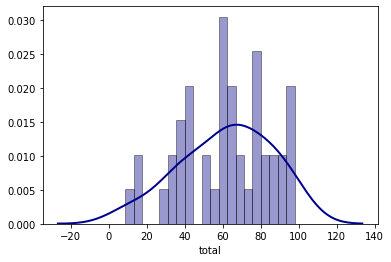

In [195]:
sns.distplot(df_clean.total, hist=True, kde=True,
            bins=20, color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth': 2});

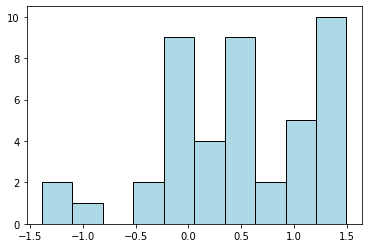

In [200]:
plt.hist(scaled_grades['se2'], color='lightblue', edgecolor='black');

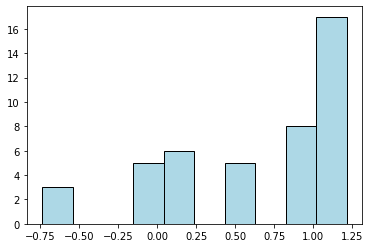

In [199]:
plt.hist(scaled_grades['se3'], color='lightblue', edgecolor='black');

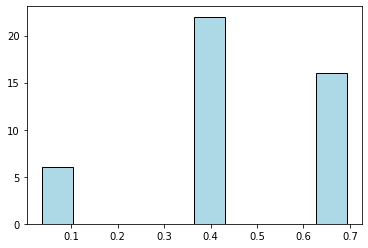

In [202]:
plt.hist(scaled_grades['se4'], color='lightblue', edgecolor='black');

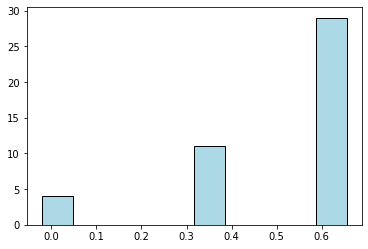

In [203]:
plt.hist(scaled_grades['se5'], color='lightblue', edgecolor='black');

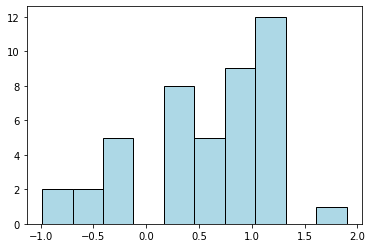

In [205]:
plt.hist(scaled_grades['se6'], color='lightblue', edgecolor='black');

# Classification

## Building Model

### Baseline Model 

#### Data Separation

In [210]:
from sklearn.model_selection import train_test_split
X = df_clean.iloc[:, 6:11].values
X_features = df_clean.iloc[:, 6:11].columns
y = df_clean.iloc[:, 28].values


# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1115) 

In [211]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (33, 5)
y_train shape: (33,)
X_test shape: (11, 5)
y_test shape: (11,)


In [212]:
model_df = pd.DataFrame(X_train, columns=X_features)

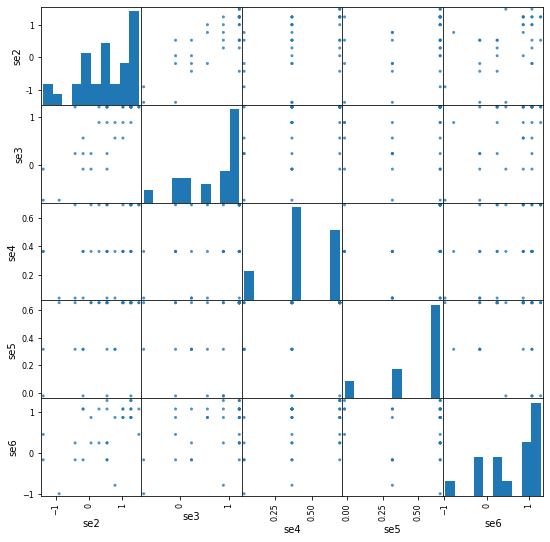

In [217]:
grr = pd.plotting.scatter_matrix(model_df, alpha=.8, figsize=(9,9))

#### K Nearest Neighbors

Start KNN classifier with 1 neighbor:

In [218]:
from sklearn.neighbors import KNeighborsClassifier
# start trying with neighbors = 1
knn = KNeighborsClassifier(n_neighbors=1)

Fit the model:

In [219]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Make prediction:

In [220]:
# making predictions
y_pred = knn.predict(X_test)

Check accuracy:

In [221]:
np.mean(y_pred == y_test)

0.45454545454545453

Try with 3 neighbors:

In [222]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.5454545454545454

Try with 5 neighbors:

In [223]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.5454545454545454

Try with 1 to 10 neighbors:

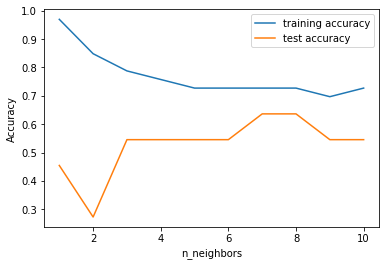

In [225]:
train_acc = []
test_acc = []
neighbors_set = range(1, 11)

for n_neighbors in neighbors_set:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(neighbors_set, train_acc, label="training accuracy")
plt.plot(neighbors_set, test_acc, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend();

In [227]:
max(test_acc)

0.6363636363636364

#### Support Vector Machine

Start with default SVM settings:

In [290]:
from sklearn.svm import SVC
svc = SVC(gamma='scale', random_state=1115)

In [291]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1115, shrinking=True,
    tol=0.001, verbose=False)

In [292]:
y_pred = svc.predict(X_test)

In [293]:
from sklearn.metrics import classification_report, confusion_matrix

In [294]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2 3]
 [1 5]]


              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.62      0.83      0.71         6

    accuracy                           0.64        11
   macro avg       0.65      0.62      0.61        11
weighted avg       0.64      0.64      0.62        11



Try to search with best parameter with grid search:

In [243]:
from sklearn.model_selection import GridSearchCV

In [336]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

In [339]:
grid = GridSearchCV(SVC(random_state=1115), param_grid, cv=5, verbose=0, iid=False)

In [340]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1115, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [341]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [342]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=1115, shrinking=True, tol=0.001,
    verbose=False)

In [343]:
grid_pred = grid.predict(X_test)

In [344]:
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

[[2 3]
 [1 5]]


              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.62      0.83      0.71         6

    accuracy                           0.64        11
   macro avg       0.65      0.62      0.61        11
weighted avg       0.64      0.64      0.62        11



#### Logistic Regression

Start with default settings:

In [318]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1115, solver='lbfgs')

In [319]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1115, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [320]:
y_pred = logreg.predict(X_test)

In [321]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2 3]
 [1 5]]


              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.62      0.83      0.71         6

    accuracy                           0.64        11
   macro avg       0.65      0.62      0.61        11
weighted avg       0.64      0.64      0.62        11



Try with different C values and penalty types:

In [329]:
C = np.logspace(0, 3, 10)

param_grid = dict(C=C)
grid = GridSearchCV(LogisticRegression(random_state=1115, solver='lbfgs'), param_grid, cv=5, iid=False, verbose=0)

In [330]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=1115, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'C': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [331]:
grid.best_params_

{'C': 4.641588833612778}

In [332]:
grid.best_estimator_

LogisticRegression(C=4.641588833612778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1115, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [333]:
grid_pred = grid.predict(X_test)

In [334]:
print(confusion_matrix(y_test, grid_pred))
print('\n')
print(classification_report(y_test, grid_pred))

[[3 2]
 [1 5]]


              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.71      0.83      0.77         6

    accuracy                           0.73        11
   macro avg       0.73      0.72      0.72        11
weighted avg       0.73      0.73      0.72        11



#### Decision Tree

Start from default settings:

In [303]:
from sklearn.tree import DecisionTreeClassifier

In [304]:
dtree = DecisionTreeClassifier(random_state=1115)

In [305]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1115, splitter='best')

In [306]:
y_pred = dtree.predict(X_test)

In [307]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[4 1]
 [4 2]]


              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.67      0.33      0.44         6

    accuracy                           0.55        11
   macro avg       0.58      0.57      0.53        11
weighted avg       0.59      0.55      0.52        11



Try with entropy as criterion:

In [308]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=1115)

In [309]:
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[4 1]
 [4 2]]


              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.67      0.33      0.44         6

    accuracy                           0.55        11
   macro avg       0.58      0.57      0.53        11
weighted avg       0.59      0.55      0.52        11



#### Random Forests

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1115)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[3 2]
 [3 3]]


              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.60      0.50      0.55         6

    accuracy                           0.55        11
   macro avg       0.55      0.55      0.55        11
weighted avg       0.55      0.55      0.55        11



#### XGBoost

In [345]:
from xgboost import XGBClassifier

In [346]:
xgb = XGBClassifier()

In [347]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [348]:
y_pred = xgb.predict(X_test)

In [349]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[3 2]
 [2 4]]


              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.67      0.67      0.67         6

    accuracy                           0.64        11
   macro avg       0.63      0.63      0.63        11
weighted avg       0.64      0.64      0.64        11



## Model Evaluation

# Clustering

# Process Mining

# Conclusions